<a href="https://colab.research.google.com/github/margotbrady/DS-1002/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [151]:
# List group members (if applicable). Identify names and computing IDs --> NOT APPLICABLE. i worked alone.
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [152]:
# Load pandas and the data
import pandas as pd
import numpy as np
# Because there are issues with loading the original dataset, I use "delimiter" to separate out the columns
df = pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv', delimiter=';')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [153]:
print(df.shape)

print("There are " + str(df.shape[0])+" rows and "+str(df.shape[1])+" columns in this dataset.")

(741, 11)
There are 741 rows and 11 columns in this dataset.


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [154]:
dfcleaned = df.copy()
# Find duplicates
print("There are " + str(dfcleaned.duplicated().sum())+" duplicate rows.")
dfcleaned = dfcleaned.drop_duplicates()

# Check the amount of nulls
print(dfcleaned.isnull().sum())
print("There are no nulls so we don't need to deal with na values.")

#Drop rows
dfcleaned = dfcleaned.drop(columns = ["timeOpen","timeClose","timeHigh","timeLow","marketCap"])


# Convert timestamp column
dfcleaned['timestamp'] = pd.to_datetime(df['timestamp'])

# sort values
dfcleaned = dfcleaned.sort_values(by='timestamp')
# Reset the index to be in the correct order
dfcleaned= dfcleaned.reset_index(drop=True)


There are 14 duplicate rows.
timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64
There are no nulls so we don't need to deal with na values.


Now display the first 10 rows of the cleaned dataset.

In [155]:
dfcleaned.head(10)

,open,high,low,close,volume,timestamp
0,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03 23:59:59.999000+00:00
1,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04 23:59:59.999000+00:00
2,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05 23:59:59.999000+00:00
3,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06 23:59:59.999000+00:00
4,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07 23:59:59.999000+00:00
5,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08 23:59:59.999000+00:00
6,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09 23:59:59.999000+00:00
7,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10 23:59:59.999000+00:00
8,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11 23:59:59.999000+00:00
9,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12 23:59:59.999000+00:00


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [156]:
# Creates a new column with all of the previous day's closing price by shifting the 'close' column down by one.
dfcleaned['previousclose']=dfcleaned['close'].shift(1)
# Calculates the difference between closing price and previous closing price
dfcleaned['close_change']=dfcleaned['close']-dfcleaned['previousclose']
dfcleaned.head(10)

,open,high,low,close,volume,timestamp,previousclose,close_change
0,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03 23:59:59.999000+00:00,NaN,NaN
1,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04 23:59:59.999000+00:00,6.923968,0.590111
2,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05 23:59:59.999000+00:00,7.514079,1.150608
3,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06 23:59:59.999000+00:00,8.664688,0.726110
4,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07 23:59:59.999000+00:00,9.390797,0.171334
5,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08 23:59:59.999000+00:00,9.562131,-0.181143
6,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09 23:59:59.999000+00:00,9.380988,0.189522
7,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10 23:59:59.999000+00:00,9.570511,-0.261701
8,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11 23:59:59.999000+00:00,9.308809,-0.697813
9,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12 23:59:59.999000+00:00,8.610997,-0.229863


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [157]:
#  Sorts the values by close_change by descending order, and puts the top 10 values in a dataframe
growthsorted = dfcleaned.sort_values(by='close_change',ascending=False).head(10)

# Converts the timestamp column from datetime format to just date for readability purposes
growthsorted['date'] = growthsorted['timestamp'].dt.date
growthsorted = growthsorted[['date','close_change']] # just selects the growth rate and date columns


# Creates a table from the dataframe without showing the index
from tabulate import tabulate
print("Top 10 Days of Positive Growth for FTX: ")
print(tabulate(growthsorted, headers='keys', tablefmt='psql', showindex=False))




Top 10 Days of Positive Growth for FTX: 
+------------+----------------+
| date       |   close_change |
|------------+----------------|
| 2021-09-01 |       16.6772  |
| 2021-09-06 |        9.80032 |
| 2021-02-19 |        8.3359  |
| 2021-05-24 |        6.33392 |
| 2021-03-09 |        5.5297  |
| 2021-08-09 |        5.32519 |
| 2021-09-08 |        5.23973 |
| 2021-04-26 |        4.50439 |
| 2021-05-05 |        4.48817 |
| 2022-02-28 |        4.40184 |
+------------+----------------+


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [158]:
dfcleaned['rate_of_change']= dfcleaned['close_change']/dfcleaned['previousclose']


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [162]:
#creates a new dataset with no NA values, because there are some NA values for the rate of change column.
dfnonas=dfcleaned.dropna()

#  Sorts the values by rate_of_change in descending order, and puts the top 5 values in a dataframe
toprates = dfnonas.sort_values(by='rate_of_change',ascending=False).head(5)
#  same but opposite for bottom rates
bottomrates= dfnonas.sort_values(by='rate_of_change',ascending=False).tail(5)

# combine datasets
growthratesorted = pd.concat([toprates,bottomrates],axis=0)

# Converts the timestamp column from datetime format to just date for readability purposes
growthratesorted['date'] = growthratesorted['timestamp'].dt.date

growthratesorted = growthratesorted[['date','rate_of_change']] # just selects the growth rate and date columns


# Creates a table from the dataframe without showing the index
from tabulate import tabulate
print("Top 5 Greatest Positive and Top 5 Negative Days of Rate Change for FTX (%): ")
print(tabulate(growthratesorted, headers='keys', tablefmt='psql', showindex=False))

Top 5 Greatest Positive and Top 5 Negative Days of Rate Change for FTX (%): 
+------------+------------------+
| date       |   rate_of_change |
|------------+------------------|
| 2022-11-10 |         0.528686 |
| 2021-09-01 |         0.343825 |
| 2021-02-19 |         0.317665 |
| 2022-12-09 |         0.246848 |
| 2022-11-15 |         0.244886 |
| 2022-11-11 |        -0.263444 |
| 2021-05-19 |        -0.275101 |
| 2022-11-13 |        -0.287059 |
| 2022-11-09 |        -0.583137 |
| 2022-11-08 |        -0.750752 |
+------------+------------------+


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

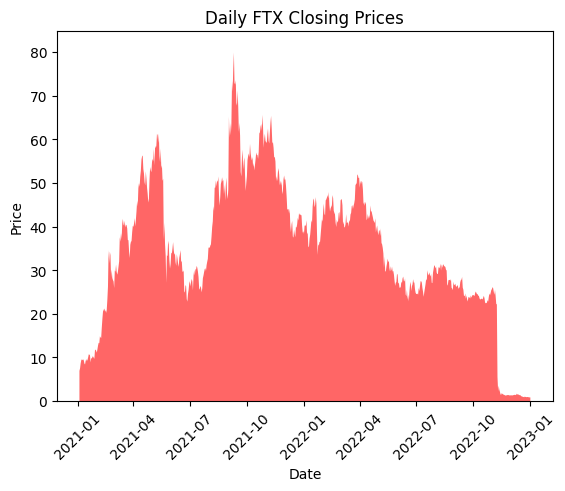

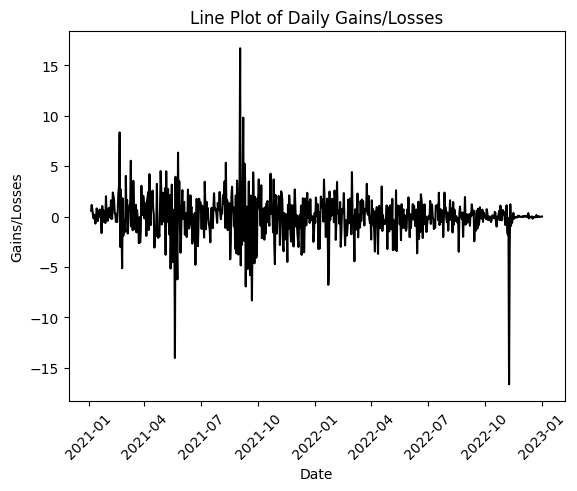

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for daily closing prices
plt.plot(dfcleaned.timestamp, dfcleaned.close_change,' ')


plt.fill_between(dfcleaned.timestamp, dfcleaned.close,  facecolor='r', alpha=.6)

plt.title("Daily FTX Closing Prices")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()


# Plot for daily gains/losses
plt.plot(dfcleaned.timestamp, dfcleaned.close_change,color = 'black')
plt.title('Line Plot of Daily Gains/Losses')
plt.xlabel('Date')
plt.ylabel('Gains/Losses')
plt.xticks(rotation=45)

plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

<ipython-input-168-43091c1a7d51>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dfplot.timestamp, rotation=45, ha='right')


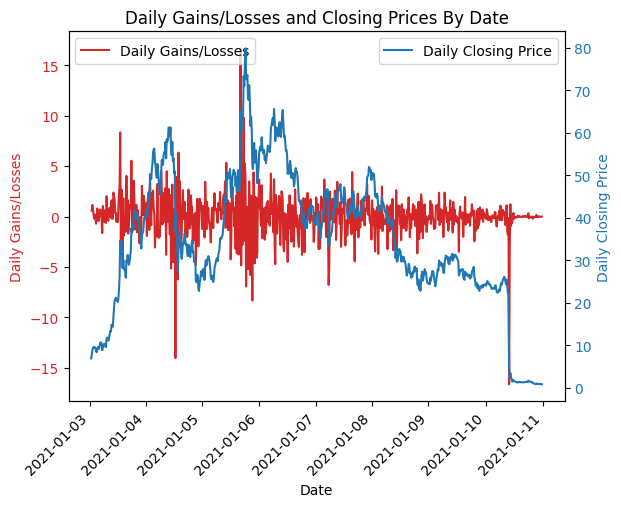

In [168]:
import numpy as np
import matplotlib.pyplot as plt

dfplot=dfcleaned.copy()
# Turns the timestamp into date format
dfplot['timestamp']=dfplot['timestamp'].dt.date

fig, ax1 = plt.subplots()
# Creates a new color for each graph, and graphs them along the same x-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Gains/Losses', color=color)
ax1.plot(dfplot.timestamp, dfplot.close_change, color=color,label='Daily Gains/Losses')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(dfplot.timestamp, rotation=45, ha='right')
ax1.legend(loc='upper left') # Adds a legend
ax2 = ax1.twinx()

# Sets title
ax1.set_title('Daily Gains/Losses and Closing Prices By Date')

color = 'tab:blue'
ax2.set_ylabel('Daily Closing Price', color=color)  # we already handled the x-label with ax1
ax2.plot(dfplot.timestamp, dfplot.close, color=color,label='Daily Closing Price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right') # Adds a legend

plt.show()